<h1>Synopsis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mean" data-toc-modified-id="Mean-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mean</a></span></li><li><span><a href="#Variance" data-toc-modified-id="Variance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variance</a></span></li><li><span><a href="#Statistical-Moments" data-toc-modified-id="Statistical-Moments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistical Moments</a></span></li><li><span><a href="#Linear-Correlation" data-toc-modified-id="Linear-Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Correlation</a></span></li><li><span><a href="#Instability-of-Estimates" data-toc-modified-id="Instability-of-Estimates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Instability of Estimates</a></span></li><li><span><a href="#MLE-fitting-Asset-Return" data-toc-modified-id="MLE-fitting-Asset-Return-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>MLE fitting Asset Return</a></span></li></ul></div>

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Mean

In [1]:
# Arithmetic
import scipy.stats as stats
import numpy as np

# We'll use these two data sets as examples
x1 = [1, 2, 2, 3, 4, 5, 5, 7]
x2 = x1 + [100]

In [3]:
np.mean(x1)
np.mean(x2)

3.625

14.333333333333334

In [4]:
# Median
np.median(x1)
np.median(x2)

3.5

4.0

In [11]:
# Mode
# Scipy mode only prints one or non-multiple occurence
stats.mode(x1)
stats.mode(x2)

ModeResult(mode=array([2]), count=array([2]))

ModeResult(mode=array([2]), count=array([2]))

In [15]:
def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (key, value) in counts.items():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

In [16]:
mode(x1)

[2, 5]

In [21]:
# Get return data for an asset and compute the mode of the data set
start = '2014-01-01'
end = '2015-01-01'
pricing = get_pricing('SPY', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]
print('Mode of returns:', mode(returns))

# Since all of the returns are distinct, we use a frequency distribution to get an alternative mode.
# np.histogram returns the frequency distribution over the bins as well as the endpoints of the bins
hist, bins = np.histogram(returns, 20) # Break data up into 20 bins
maxfreq = max(hist)
# Find all of the bins that are hit with frequency maxfreq, then print the intervals corresponding to them
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

NameError: name 'get_pricing' is not defined

In [22]:
# Geometric Mean
stats.gmean(x1)
stats.gmean(x2)

3.0941040249774403

4.552534587620071

In [ ]:
# Gmean for negative 
# Add 1 to every value in the returns array and then compute R_G
ratios = returns + np.ones(len(returns))
R_G = stats.gmean(ratios) - 1
print 'Geometric mean of returns:', R_G

The geometric mean is defined so that if the rate of return over the whole time period were constant and equal to  RG , the final price of the security would be the same as in the case of returns  R1,…,RT .

In [23]:
# Harmonic Mean
# Reciprocal of H mean is the Arimetic mean of the Reciprocal of X

stats.hmean(x1)
stats.hmean(x2)

2.5590251332825593

2.869723656240511

The harmonic mean can be used when the data can be naturally phrased in terms of ratios. For instance, in the dollar-cost averaging strategy, a fixed amount is spent on shares of a stock at regular intervals. The higher the price of the stock, then, the fewer shares an investor following this strategy buys. The average (arithmetic mean) amount they pay for the stock is the harmonic mean of the prices.

# Variance

In [24]:
np.random.seed(42)

In [25]:
X = np.random.randint(100, size=20)
X = np.sort(X)
print(X)
mu = np.mean(X)
print(mu)

[ 1  2 14 20 21 23 29 37 51 52 60 71 74 74 82 86 87 87 92 99]
53.1


In [26]:
# Range
print(np.ptp(X))

98


In [27]:
# MAD
abs_dispersion = [np.abs(mu - x) for x in X]
MAD = np.sum(abs_dispersion) / len(abs_dispersion)
print(MAD)

28.099999999999994


In [28]:
# Chebyshev's Inequality
# 1 - 1/k^2 at least for k Std 
k = 1.25
dist = k*np.std(X)
l = [x for x in X if abs(x - mu) <= dist]
print( 'Observations within', k, 'stds of mean:', l)
print('Confirming that', float(len(l))/len(X), '>', 1 - 1/k**2)

Observations within 1.25 stds of mean: [14, 20, 21, 23, 29, 37, 51, 52, 60, 71, 74, 74, 82, 86, 87, 87, 92]
Confirming that 0.85 > 0.36


The bound given by Chebyshev's inequality seems fairly loose in this case. This bound is rarely strict, but it is useful because it holds for all data sets and distributions.

In [29]:
# Semi-VAR and STD
# Because there is no built-in semideviation, we'll compute it ourselves
lows = [e for e in X if e <= mu]

semivar = np.sum( (lows - mu) ** 2 ) / len(lows)

print('Semivariance of X:', semivar)
print('Semideviation of X:', np.sqrt(semivar))

Semivariance of X: 1073.21
Semideviation of X: 32.759884004678646


In [30]:
# Target SemiVAR
B = 19
lows_B = [e for e in X if e <= B]
semivar_B = sum(map(lambda x: (x - B)**2,lows_B))/len(lows_B)

print('Target semivariance of X:', semivar_B)
print( 'Target semideviation of X:', np.sqrt(semivar_B))

Target semivariance of X: 212.66666666666666
Target semideviation of X: 14.583095236151571


# Statistical Moments

In [32]:
import pandas_datareader as web

In [33]:
start = '2013-04-22'
end = '2018-04-22'
df_az = web.DataReader(name='AMZN', data_source='iex', start=start, end=end)

In [34]:
df_az.head()

,open,high,low,close,volume
date,,,,,
2013-12-30,399.41,399.92,392.45,393.37,2487812
2013-12-31,394.58,398.83,393.80,398.79,1997051
2014-01-02,398.80,399.36,394.02,397.97,2140246
2014-01-03,398.29,402.71,396.22,396.44,2213512
2014-01-06,395.85,397.00,388.42,393.63,3172207


In [37]:
# Skewness Testing
import matplotlib.pyplot as plt
# Collect Data.

returns = df_az.close.pct_change()[1:]

# Calculate Mean, Median and Mode. 
mean = np.mean(returns)
median = np.median(returns)
mode = stats.mode(returns)[0][0]

print('mean:', mean)
print('median:', median)
print('mode:', mode)
print(len(returns))

# Setting parameters and print skewness outcome. 
if mode < median < mean:
    print(  'The returns are positivly skewed.')
if mean<median<mode: 
    print( 'The returns are negativly skewed.')
if mean == median == mode:
    print( 'There is no Skewness: the returns are symetricaly distributed')

mean: 0.0014268526423642535
median: 0.001126107999231185
mode: -0.10997245725912508
1084
The returns are positivly skewed.


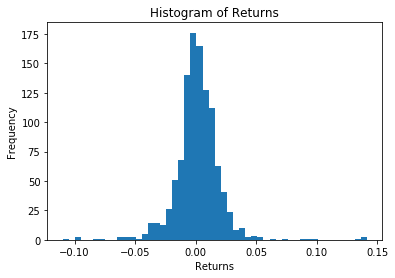

In [38]:
plt.hist(returns, bins = 50);
plt.xlabel('Returns');
plt.ylabel('Frequency');
plt.title('Histogram of Returns');

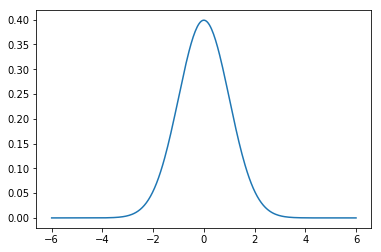

In [39]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal);

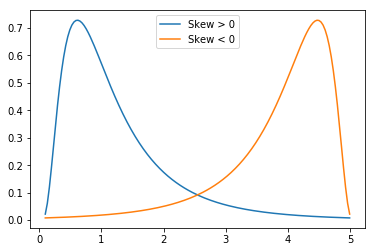

In [40]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)

# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew > 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend();

Skew: -0.3807960040713349
Mean: 0.00045786988837052945
Median: 0.0004204097836617571


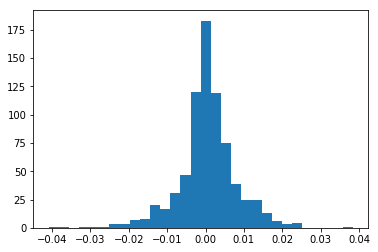

In [45]:

start = '2015-01-01'
end = '2018-01-01'
df_spy = web.DataReader(name='SPY', data_source='iex', start=start, end=end)
returns = df_spy.close.pct_change()[1:]

print( 'Skew:', stats.skew(returns))
print( 'Mean:', np.mean(returns))
print( 'Median:', np.median(returns))

plt.hist(returns, 30);

In [46]:
# Normality Test Jarque-Bera
from statsmodels.stats.stattools import jarque_bera

In [47]:
N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print( float(num_significant) / N)

0.052


Great, if properly calibrated we should expect to be wrong  5%  of the time at a 0.05 significance level, and this is pretty close. This means that the test is working as we expect.

In [48]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print( 'The returns are likely normal.')
else:
    print( 'The returns are likely not normal.')

The returns are likely not normal.


Text(0.5, 0, 'Day')

Text(0, 0.5, '60-day Rolling Skew')

This confirms our result from part c, that the skew is too volatile to use it to make predictions outside of the sample.


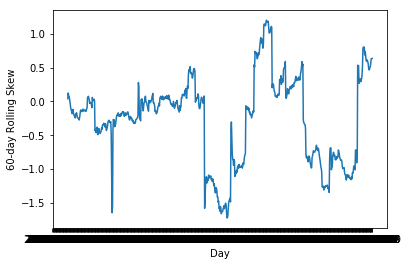

In [50]:
# Rolling Skew
#Your code goes here
rolling_skew = returns.rolling(window=60,center=False).skew()
plt.plot(rolling_skew)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Skew')
print( "This confirms our result from part c, that the skew is too volatile to use it to make predictions outside of the sample.")

# Linear Correlation

In [56]:
import pandas as pd

In [54]:
# Limitation: Significance and Temporal Variance
# As an example, remember that the correlation of AAPL and LRCX from 2013-1-1 to 2015-1-1 was 0.95. 
# Let's take the rolling 60 day correlation between the two to see how that varies.


start = '2015-01-01'
end = '2018-01-01'
a1 = web.DataReader(name='LRCX', data_source='iex', start=start, end=end).close
a2 = web.DataReader(name='AAPL', data_source='iex', start=start, end=end).close

Text(0.5, 0, 'Day')

Text(0, 0.5, '60-day Rolling Correlation')

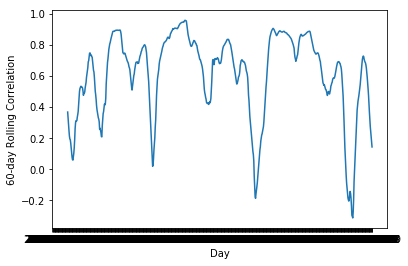

In [59]:
rolling_correlation = a1.rolling(60).corr(a2.rolling(60))
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

> Are these two methods of Rolling Corr the same? Looks so....why?

Text(0.5, 0, 'Day')

Text(0, 0.5, '60-day Rolling Correlation')

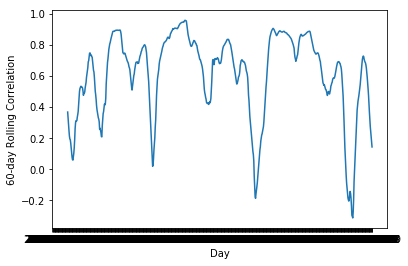

In [61]:
rolling_correlation = a1.rolling(60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

As an example, let's make the noise distribution poisson rather than normal and see what happens.

0.3009217824384498

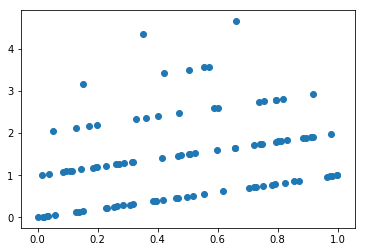

In [60]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

# Instability of Estimates

In [81]:
# SHARPE Ratio: which measures the additional return per unit additional risk achieved by a portfolio, 
# relative to a risk-free source of return such as Treasury bills:

def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

start = '2015-01-01'
end = '2018-01-01'
# Use an ETF that tracks 3-month T-bills as our risk-free rate of return
treasury_ret = web.DataReader(name='BIL', data_source='iex', start=start, end=end).close.pct_change()[1:]
pricing = web.DataReader(name='AMZN', data_source='iex', start=start, end=end).close
returns = pricing.pct_change()[1:]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

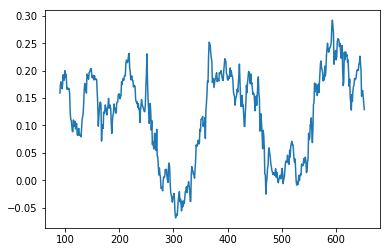

In [82]:
# Compute the running Sharpe ratio
running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

# Plot running Sharpe ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots()
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100]);
ticks = ax1.get_xticks()
ax1.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio');

The standard deviation in this case is about a quarter of the range, so this data is extremely volatile. Taking this into account when looking ahead gave a better prediction than just using the mean, although we still observed data more than one standard deviation away. We could also compute the rolling mean of the Sharpe ratio to try and follow trends; but in that case, too, we should keep in mind the standard deviation.

In fact, the standard deviation, which we use to quantify variability, is itself variable. Below we plot the rolling standard deviation (for a 90-day window), and compute its mean and standard deviation.

Text(0, 0.5, 'Standard Deviation of Moving Average')

Text(0.5, 0, 'Date')

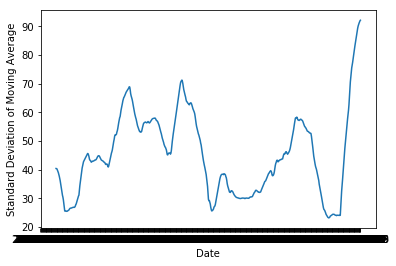

Mean of rolling std: 45.29779723395034
std of rolling std: 14.453842428807429


In [86]:
# Compute rolling standard deviation
std = pricing.rolling(90).std()

# Plot rolling std
_, ax2 = plt.subplots()
ax2.plot(std)
 # Label x-axis with dates
plt.ylabel('Standard Deviation of Moving Average')
plt.xlabel('Date')
plt.show()
print( 'Mean of rolling std:', np.mean(std))
print( 'std of rolling std:', np.std(std))

To see what this changing standard deviation means for our data set, let's plot the data again along with the Bollinger bands: the rolling mean, one rolling standard deviation (of the data) above the mean, and one standard deviation below.

Note that although standard deviations give us more information about the spread of the data, we cannot assign precise probabilities to our expectations for future observations without assuming a particular distribution for the underlying process.

**Conclusion**

Whenever we compute a parameter for a data set, we should also compute its volatility. Otherwise, we do not know whether or not we should expect new data points to be aligned with this parameter. A good way of computing volatility is dividing the data into subsets and estimating the parameter from each one, then finding the variability among the results. There may still be outside factors which are introduced after our sample period and which we cannot predict. However, the instability analysis and testing for standard error is still very useful for telling us how much we should distrust our estimates.

# MLE fitting Asset Return

In [87]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

In [88]:
# Normal
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

In [89]:
def normal_mu_MLE(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma_MLE(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu_MLE(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

In [90]:
print( "Mean Estimation")
print( normal_mu_MLE(X))
print( np.mean(X))
print( "Standard Deviation Estimation")
print( normal_sigma_MLE(X))
print( np.std(X))

Mean Estimation
39.80955119446248
39.80955119446249
Standard Deviation Estimation
10.007950750472036
10.007950750472045


In [91]:
mu, std = scipy.stats.norm.fit(X)
print( "mu estimate: " + str(mu))
print( "std estimate: " + str(std))

mu estimate: 39.80955119446249
std estimate: 10.007950750472045


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


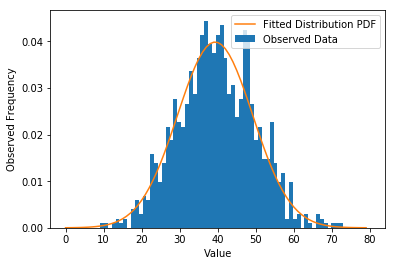

In [92]:
pdf = scipy.stats.norm.pdf
# We would like to plot our data along an x-axis ranging from 0-80 with 80 intervals
# (increments of 1)
x = np.linspace(0, 80, 80)
plt.hist(X, bins=x, normed='true')
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

In [93]:
# Exponential
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

In [94]:
def exp_lamda_MLE(X):
    T = len(X)
    s = sum(X)
    return s/T

In [95]:
print( "lambda estimate: " + str(exp_lamda_MLE(X)))

lambda estimate: 5.253471712306308


In [96]:
# The scipy version of the exponential distribution has a location parameter
# that can skew the distribution. We ignore this by fixing the location
# parameter to 0 with floc=0
_, l = scipy.stats.expon.fit(X, floc=0)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


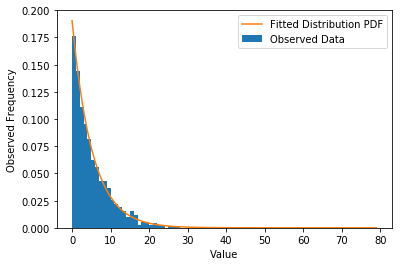

In [97]:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
plt.hist(X, bins=x, normed='true')
plt.plot(pdf(x, scale=l))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

In [100]:
# MLE for asset

# This will give us the number of dollars returned each day
absolute_returns = np.diff(pricing)
# This will give us the percentage return over the last day's value
# the [:-1] notation gives us all but the last item in the array
# We do this because there are no returns on the final price in the array.
returns = absolute_returns/pricing[:-1]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


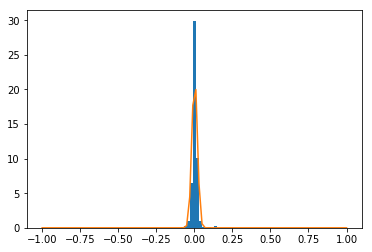

In [101]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1, num=100)
h = plt.hist(returns, bins=x, normed='true')
l = plt.plot(x, pdf(x, loc=mu, scale=std))

Of course, this fit is meaningless unless we've tested that they obey a normal distribution first. We can test this using the Jarque-Bera normality test. The Jarque-Bera test will reject the hypothesis of a normal distribution if the p-value is under a c.

In [102]:
jarque_bera(returns)

(7879.863668874675, 0.0, 1.9263656545448904, 18.361458367446858)

In [103]:
jarque_bera(np.random.normal(0, 1, 100))

(0.4009995352197835, 0.818321680195574, 0.1449735470172959, 3.1103203114283295)

In [105]:
# Fit only makes sense if underlying distribution follows
alpha = 0.05
stat, pval = scipy.stats.mstats.normaltest(returns)
print(pval)

if pval > alpha: 
    print( 'Accept our null hypothesis')
if pval < alpha: 
    print( 'Reject our null hypothesis')

2.544079820270809e-87
Reject our null hypothesis
